The Sparks Foundaion- Data Science & Business Analytics Internship     
Task 3: Perform 'Exploratory Data Analysis' on Dataset "samplesuperstore

In this task we will try to find out the weak areas where we can work to make more profit

stepd to be followed
> Importing the libraries                 
> Reading the dataset               
> EDA                 
> Data Visualixation                 

# STEP 1: IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wg
wg.filterwarnings("ignore")

# READING THE DATASET

In [5]:
 df = pd.read_csv("SampleSuperstore.csv")
    

In [6]:
 df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
# clearing the data
df = df.drop(['Postal Code'], axis = 1)

In [8]:
df.shape

(9994, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [12]:
# checking the duplicates 
df.duplicated().sum()
# deleting the duplicated values
df = df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
# unique values in category
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
# Unique values in sub-category
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
# counting the number of repetitions of each value in the category
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

In [16]:
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [17]:
# Checking for the null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Exploratory Data Analysis

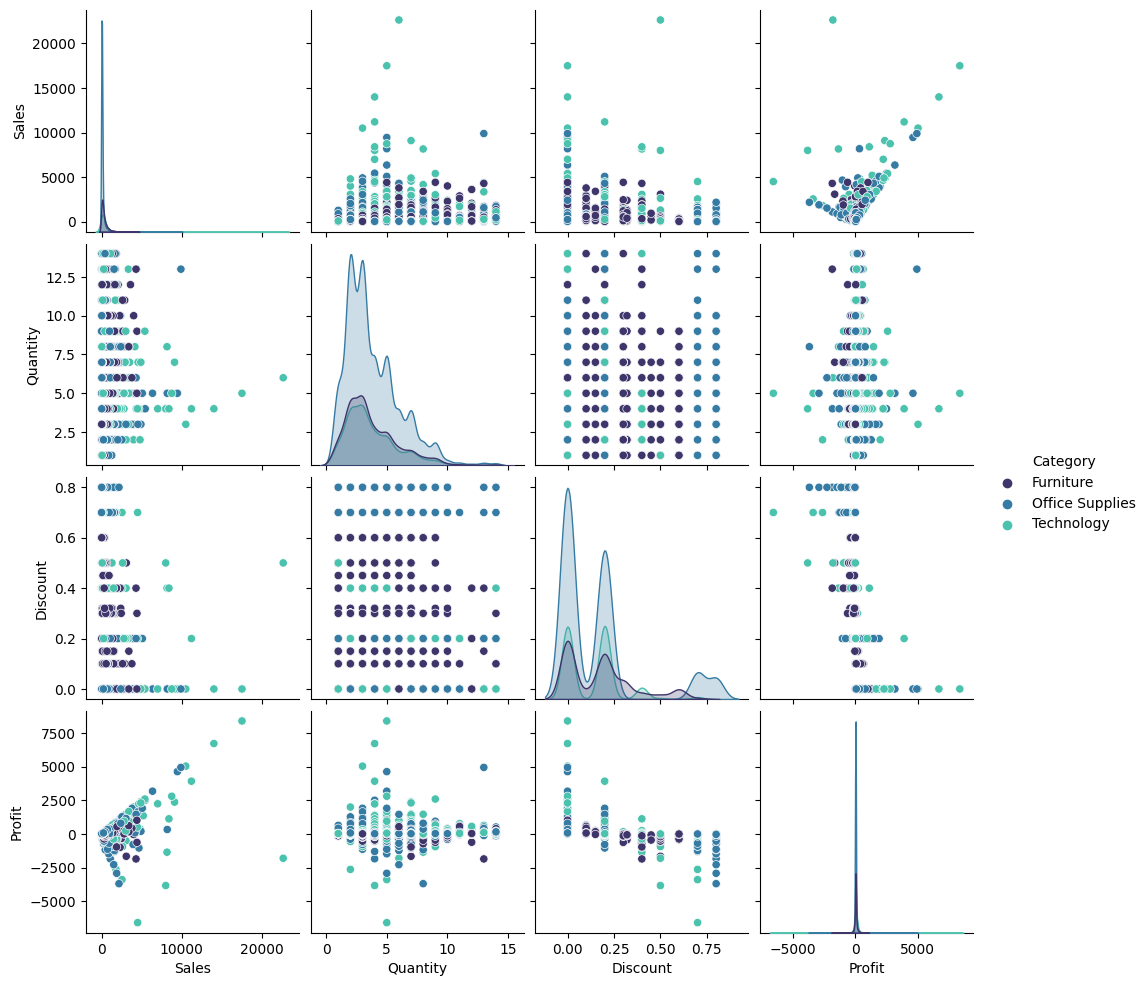

In [18]:
# Visualizing the dataset a whole using the pairplot based on categories
sns.pairplot(df, hue = 'Category', diag_kind = 'kde',palette='mako')

<Axes: >

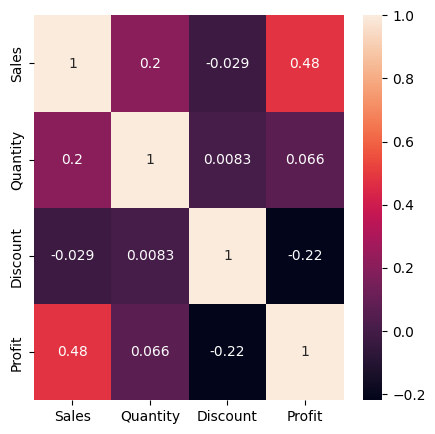

In [19]:
# Finding the pairwise correlation between attributes and visualising them by using  heatmap
cor = df.corr()
# visualising using heatmap
plt.subplots(figsize=(5,5))
sns.heatmap(cor,annot = True)

<Axes: ylabel='Category'>

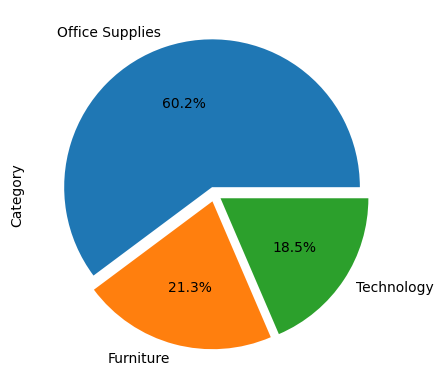

In [20]:
# visualizing the categories of items sold using pie chart
df.Category.value_counts().plot( kind = 'pie', autopct = '%1.01f%%', explode = (0.05,0.05,0.05))

<Axes: xlabel='Category'>

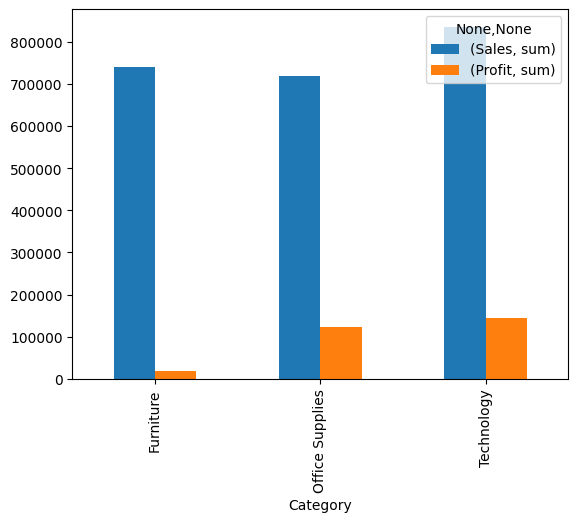

In [21]:
# plotting the overall profits and overall sales of different categories of items
df.groupby('Category')['Sales','Profit'].agg(['sum']).plot.bar()

Text(0.5, 1.0, 'Top Category Sales VS Profit')

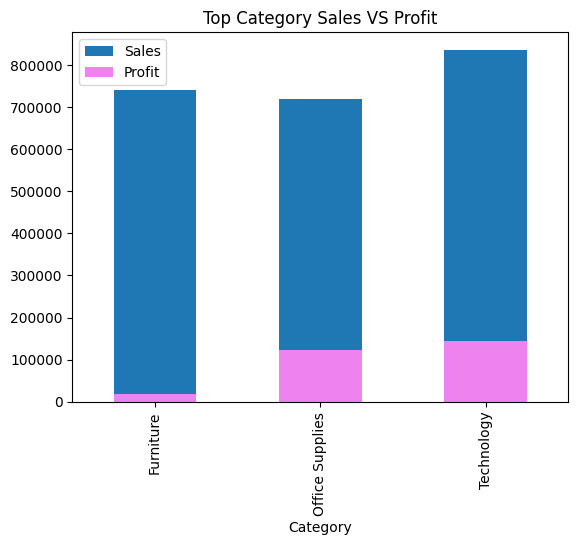

In [22]:
# Calculating the top selling category of items
transform_s = df.groupby('Category').Sales.sum()
# Calculating the top profit-making category of items
transform_p = df.groupby('Category').Profit.sum()

# visualizing to understand it concisely
transform_s.plot( kind = 'bar', fontsize = 10 , legend  = True)
transform_p.plot( kind = 'bar',fontsize = 10, color = 'violet',legend = True)
plt.title('Top Category Sales VS Profit')

<Axes: xlabel='Region'>

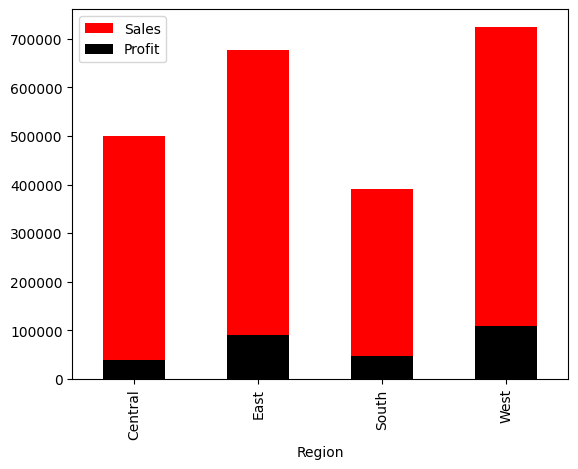

In [23]:
# calculating the regions in terms of sales mode
transform_s = df.groupby('Region').Sales.sum()
# calculating the top regions in  terms of profit generated 
transform_p = df.groupby('Region').Profit.sum()

# visualizing to understand concisely
# visualizing to understand it concisely
transform_s.plot( kind = 'bar', fontsize = 10 , color = 'red',legend  = True)
transform_p.plot( kind = 'bar',fontsize = 10, color = 'black',legend = True)

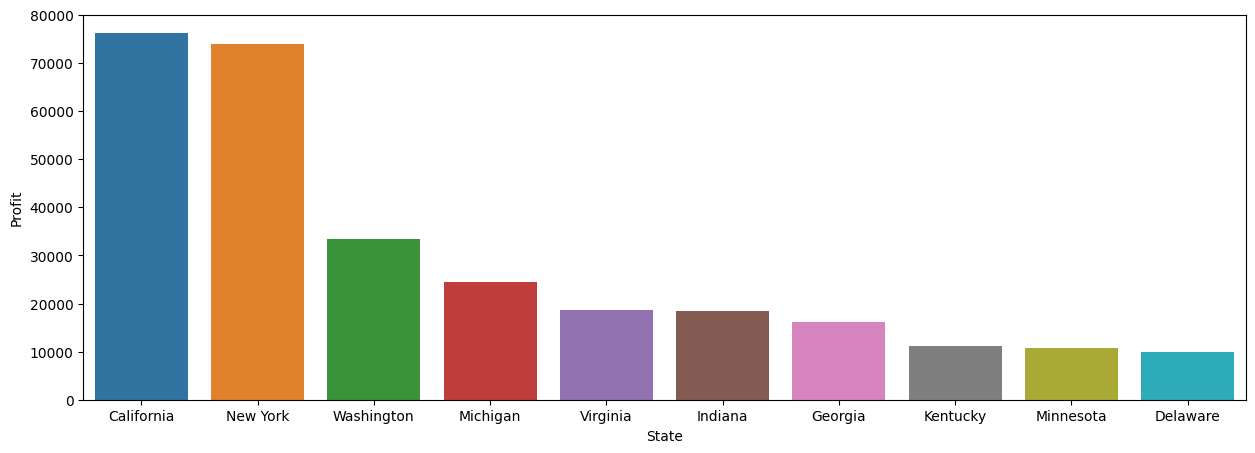

In [24]:
Top_state = df.groupby('State').sum().reset_index().sort_values('Profit',ascending = False)
Top10_states = Top_state[:10].loc[:,('State','Profit')]
plt.figure(figsize=(15,5))
sns.barplot(data=Top10_states,x='State',y= 'Profit')
plt.show()

<Axes: xlabel='Sub-Category'>

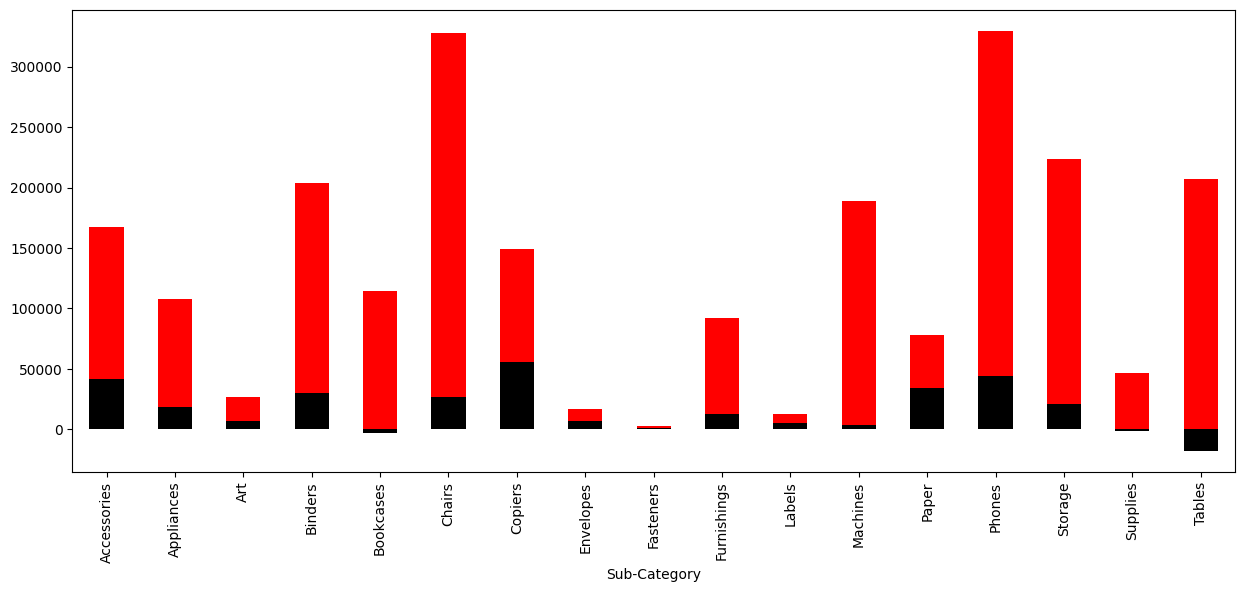

In [25]:
# Calculating the Sales made in the product subcategory
transform_s = df.groupby('Sub-Category').Sales.sum()
#calculating the top sales made in the product Subcategory
transform_p = df.groupby('Sub-Category').Profit.sum()
# visualizing to understand concisely
plt.subplots(figsize=(15,6))
transform_s.plot( kind = 'bar', fontsize = 10 , color = 'red')
transform_p.plot( kind = 'bar',fontsize = 10, color = 'black')

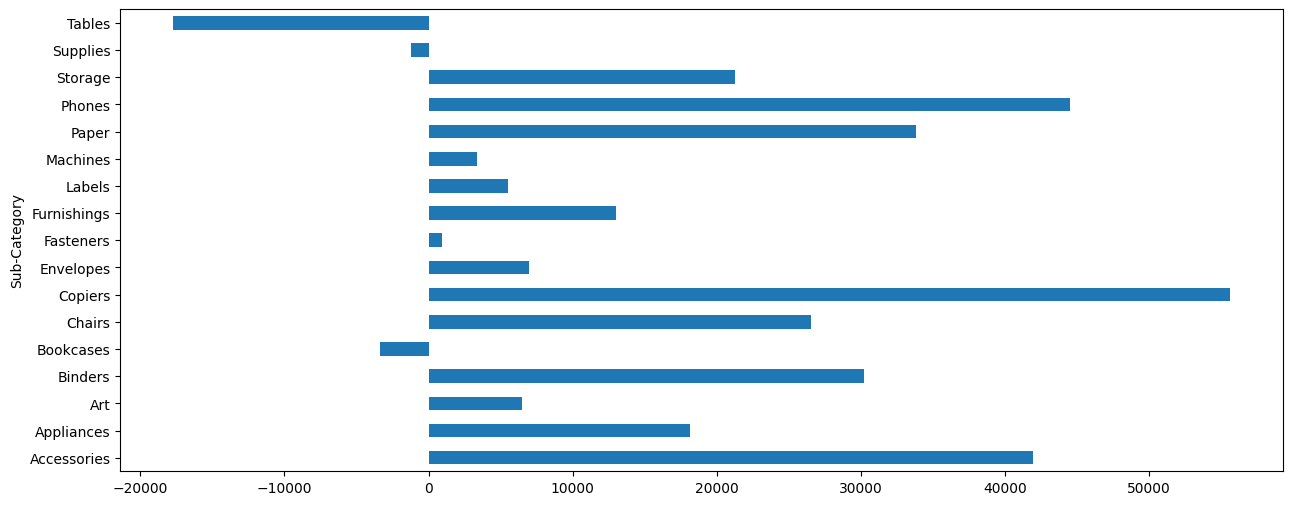

In [26]:
# plotting the profit made in product subcategory horizontally
plt.subplots(figsize = (15,6))
transform_p.plot(kind = 'barh',fontsize = 10)
plt.show()

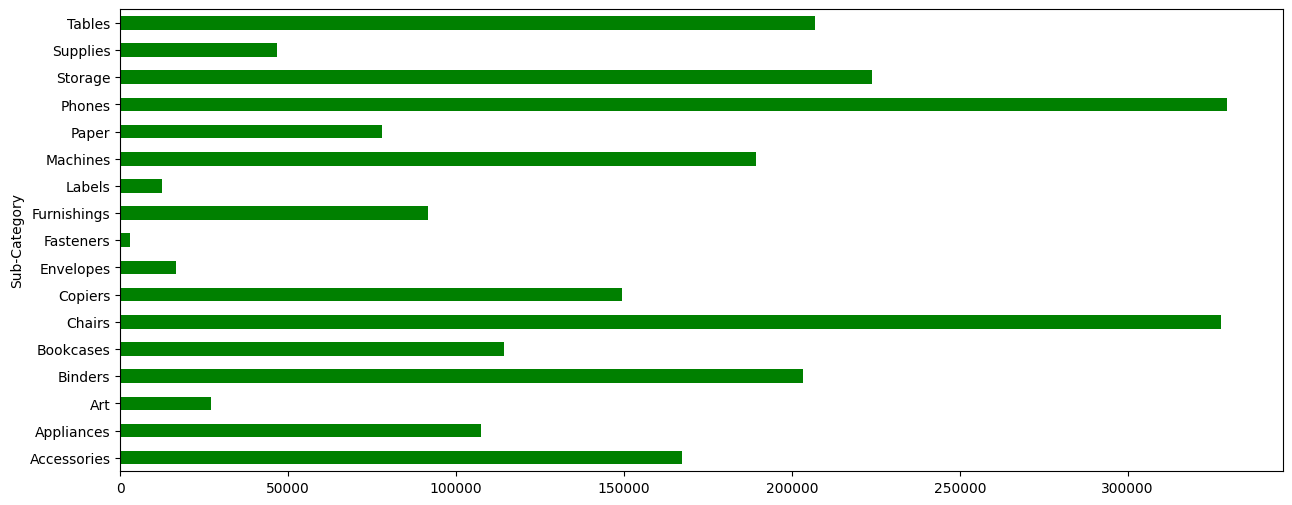

In [27]:
plt.subplots(figsize = (15,6))
transform_s.plot(kind = 'barh' , fontsize = 10, color='green')
plt.show()


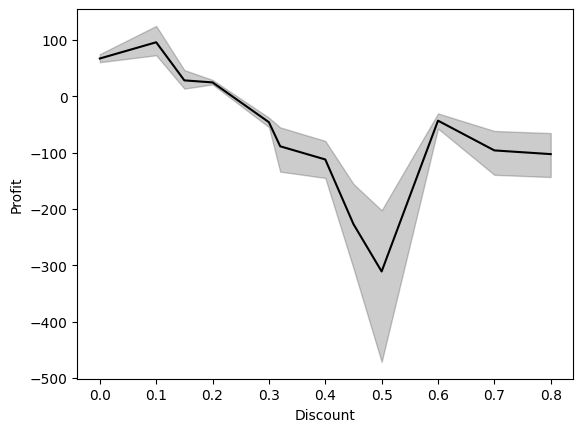

In [28]:
sns.lineplot(data=df, x='Discount', y= 'Profit',color= 'black')
plt.show()

<Axes: xlabel='Sales', ylabel='Profit'>

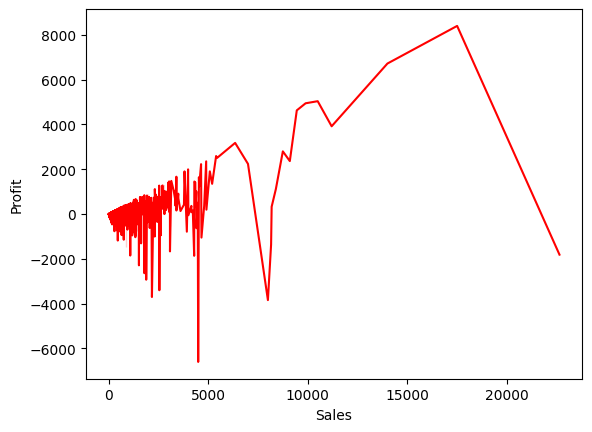

In [29]:
sns.lineplot(data=df,x='Sales',y='Profit',color='red')


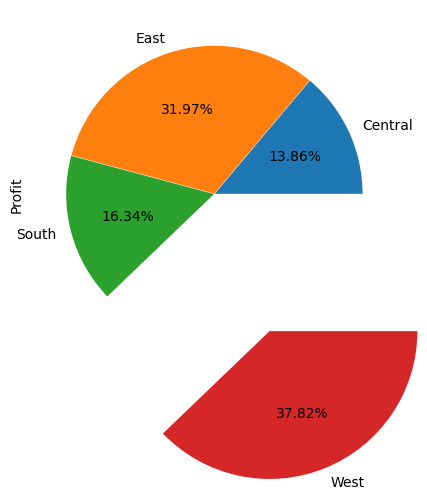

In [30]:
df.groupby('Region').sum().plot(kind = 'pie',y='Profit', autopct = '%1.02f%%', explode = (0.0025,0.0025,0.0025,1),legend=False)
plt.show()

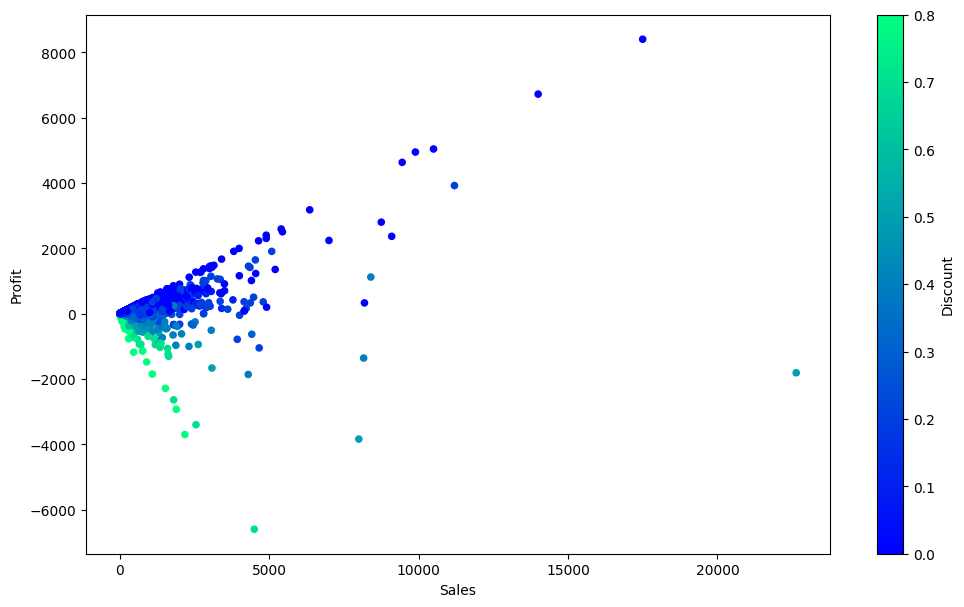

In [31]:


# Assuming you have a DataFrame named 'df' with columns 'Sales', 'Profit', and 'Discount'
df.plot(kind='scatter', figsize=(12, 7), x='Sales', y='Profit', c='Discount', colormap='winter')
plt.show()
